### Aniket Rajendra Shoste

## E-Commerce – EDA – Python Project 2
Context of Data
 Company - UK-based and registered non-store online retail
 Products for selling - Mainly all-occasion gifts
 Customers - Most are wholesalers (local or international)
 Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year) 

### Problem Statements:
1. Perform Basic EDA
a. Boxplot – All Numeric Variables
b. Histogram – All Numeric Variables
c. Distribution Plot – All Numeric Variables
d. Aggregation for all numerical Columns
e. Unique Values across all columns
f. Duplicate values across all columns
g. Correlation – Heatmap - All Numeric Variables
h. Regression Plot - All Numeric Variables
i. Bar Plot – Every Categorical Variable vs every Numerical Variable
j. Pair plot - All Numeric Variables
k. Line chart to show the trend of data - All Numeric/Date Variables
l. Plot the skewness - All Numeric Variables 


In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Ecommerce - UK Retailer.csv',encoding = 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


## 2. Check for missing values in all columns and replace them with the appropriate metric
(Mean/Median/Mode) 

In [6]:
df.isna().sum().sum()

136534

In [7]:
df.isna().sum().sort_values()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
Description      1454
CustomerID     135080
dtype: int64

In [8]:
df[df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [9]:
df= df.dropna()

In [10]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


### 3. Remove duplicate rows 

In [12]:
df.duplicated().sum()

5225

In [13]:
(~df.duplicated()).sum()  # to see the reaminng records which are not duplicate

401604

In [14]:
df.loc[df.duplicated() ,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [15]:
df = df.drop_duplicates()

In [16]:
df.loc[df.duplicated() ,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [17]:
df.duplicated().sum()

0

### 4. Remove rows which have negative values in Quantity column

In [18]:
df['Quantity'].value_counts()

 1        69605
 12       59828
 2        57425
 6        37480
 4        32093
          ...  
 828          1
 560          1
-408          1
 512          1
-80995        1
Name: Quantity, Length: 436, dtype: int64

In [19]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [20]:
index_names = df[df['Quantity'] < 0].index

In [21]:
df.drop(index_names , inplace= True) 

In [22]:
df['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

### 5. Add the columns - Month, Day and Hour for the invoice 

In [23]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [24]:
df['InvoiceDate'].head(3)

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [276]:
df['Month'] = df['InvoiceDate'].apply(lambda time: time.month)
df['Day']=(df['InvoiceDate'].dt.dayofweek)+1
df['Hour']  =  df['InvoiceDate'].apply(lambda time: time.hour)
df['Year'] = df['InvoiceDate'].apply(lambda time : time.year) 
df['Money_spent'] =df['Quantity'] *df['UnitPrice']  # Total- Amount 

In [291]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,Year,Money_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,3,8,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,3,8,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,3,8,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,3,8,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,3,8,2010,20.34


## ### 1. Perform Basic EDA
a. Boxplot – All Numeric Variables
b. Histogram – All Numeric Variables
c. Distribution Plot – All Numeric Variables
d. Aggregation for all numerical Columns
e. Unique Values across all columns
f. Duplicate values across all columns
g. Correlation – Heatmap - All Numeric Variables
h. Regression Plot - All Numeric Variables
i. Bar Plot – Every Categorical Variable vs every Numerical Variable
j. Pair plot - All Numeric Variables
k. Line chart to show the trend of data - All Numeric/Date Variables
l. Plot the skewness - All Numeric Variables 

In [33]:
pd.unique(df[['Country','Description','StockCode','Country']].values.ravel())

array(['United Kingdom', 'WHITE HANGING HEART T-LIGHT HOLDER', '85123A',
       ..., 'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE', '23843'], dtype=object)

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,392732.0,13.153718,181.588420,1.0,2.00,6.00,12.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,1.25,1.95,3.75,8142.75
CustomerID,392732.0,15287.734822,1713.567773,12346.0,13955.00,15150.00,16791.00,18287.00
Month,392732.0,7.601935,3.415023,1.0,5.00,8.00,11.00,12.00
Day,392732.0,3.606920,1.923892,1.0,2.00,3.00,5.00,7.00
Hour,392732.0,12.721579,2.276677,6.0,11.00,13.00,14.00,20.00
Year,392732.0,2010.934630,0.247178,2010.0,2011.00,2011.00,2011.00,2011.00
Money_spent,392732.0,22.629195,311.083465,0.0,4.95,12.39,19.80,168469.60


### a. Boxplot – All Numeric Variables

C:\Users\ravAn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


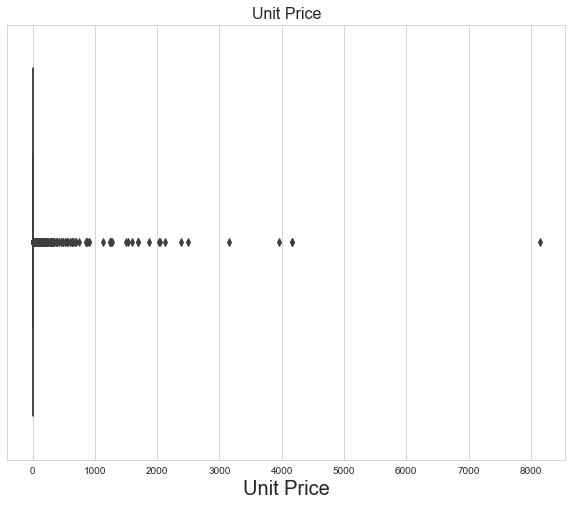

In [47]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,8))
sns.boxplot(df['UnitPrice'])
plt.xlabel('Unit Price' ,size =20)
plt.title('Unit Price' ,size = 16)
plt.show()

Text(0.5, 0, 'Unit Price')

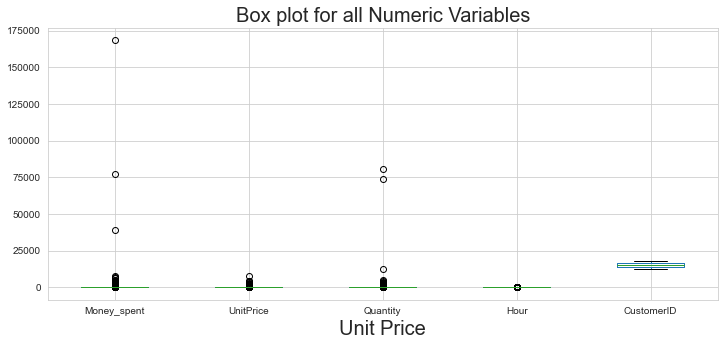

In [52]:
sns.set_style('whitegrid')
df.boxplot(column = [  'Money_spent', 'UnitPrice','Quantity', 'Hour','CustomerID' ] , fontsize= 10,figsize =(12,5))
plt.title('Box plot for all Numeric Variables' ,size =20)
plt.xlabel('Unit Price' ,size =20)


### b. Histogram – All Numeric Variables

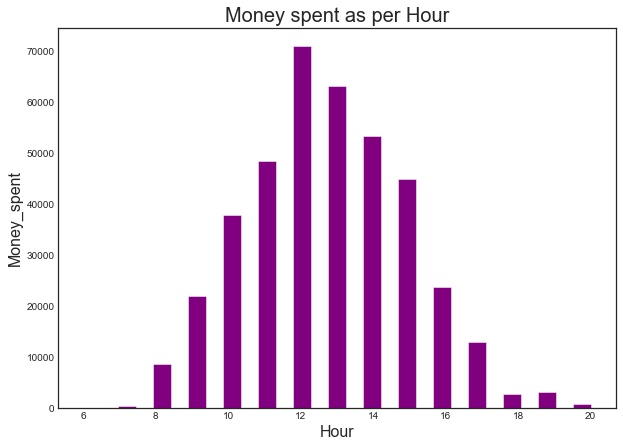

In [274]:
sns.set_style('white')
plt.subplots(figsize=(10,7))
plt.hist(df['Hour'], color = 'Purple',bins = 29)
plt.title('Money spent as per Hour' ,size =20)
plt.xlabel('Hour',size =16)
plt.ylabel('Money_spent',size =16)
plt.show()

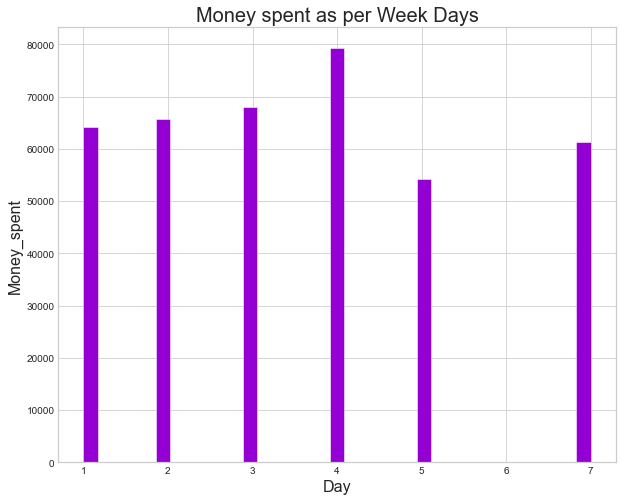

In [275]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,7))
plt.hist(df['Day'], color = 'darkviolet', bins = 35)
plt.title('Money spent as per Week Days' ,size =20)
plt.xlabel('Day',size =16)
plt.ylabel('Money_spent',size =16)
plt.show()

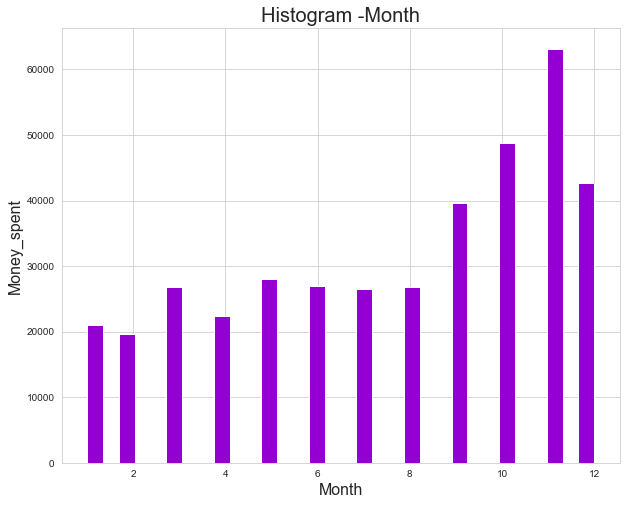

In [100]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,8))
plt.hist(df['Month'], color = 'darkviolet', bins = 32)
plt.title('Histogram -Month' ,size =20)
plt.xlabel('Month',size =16)
plt.ylabel('Money_spent',size =16)
plt.show()

### c. Distribution Plot – All Numeric Variables

C:\Users\ravAn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


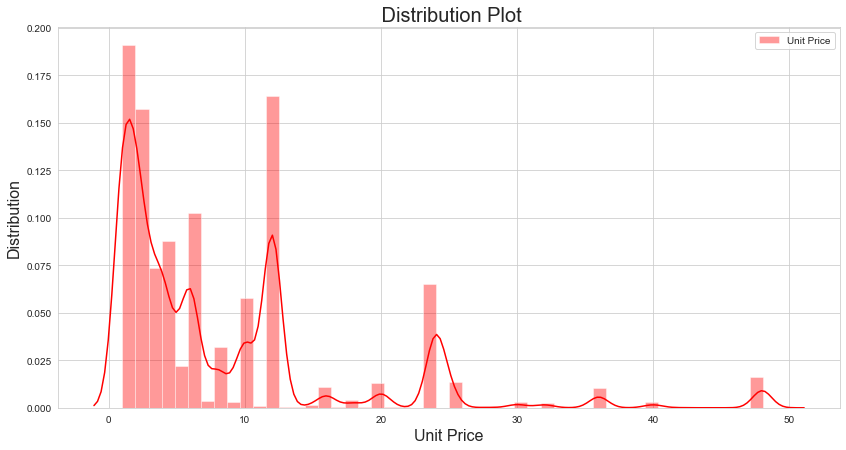

In [149]:
sns.set_style('whitegrid')
plt.subplots(figsize=(14,7))
sns.distplot(df['Quantity'][df.Quantity < 50], label='Unit Price',color ='red').legend()
plt.xlabel('Unit Price',size =16)
plt.ylabel('Distribution',size =16)
plt.title(' Distribution Plot' ,size =20)
plt.show()

g. Correlation – Heatmap - All Numeric Variables

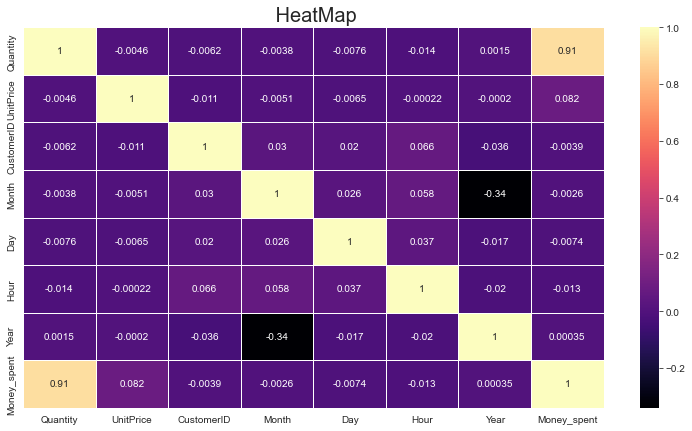

In [153]:
plt.subplots(figsize=(13,7))
sns.heatmap(df.corr(),linecolor='white',linewidths=1,cmap ='magma',annot=True)
plt.title(' HeatMap' ,size =20)
plt.show()

h. Regression Plot - All Numeric Variables

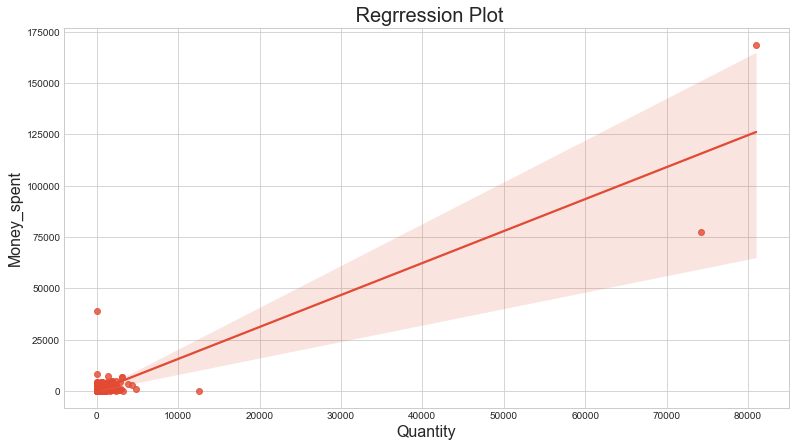

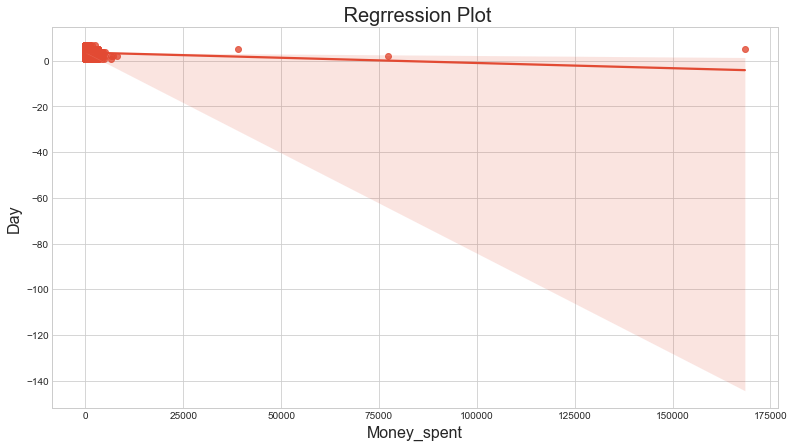

In [317]:
plt.subplots(figsize=(13,7))
sns.regplot( x = 'Quantity' ,y = 'Money_spent' ,data = df)
plt.xlabel('Quantity',size =16)
plt.ylabel('Money_spent',size =16)
plt.title(' Regrression Plot' ,size =20)
plt.show()

plt.subplots(figsize=(13,7))
sns.regplot( x = 'Money_spent' ,y = 'Day' ,data = df)
plt.xlabel('Money_spent',size =16)
plt.ylabel('Day',size =16)
plt.title(' Regrression Plot' ,size =20)
plt.show()


i. Bar Plot – Every Categorical Variable vs every Numerical Variable


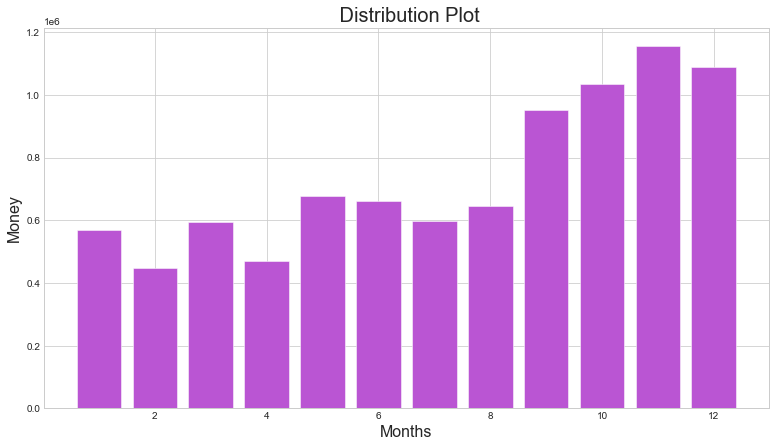

In [314]:
sns.set_style('whitegrid')
plt.subplots(figsize=(13,7))
plt.bar(month,result['Money_spent'] ,color = 'mediumorchid')
plt.xlabel('Months',size =16)
plt.ylabel('Money',size =16)
plt.title(' Distribution Plot' ,size =20)
plt.show()

 j. Pair plot - All Numeric Variables


Text(0.5, 1.0, ' Pair Plot')

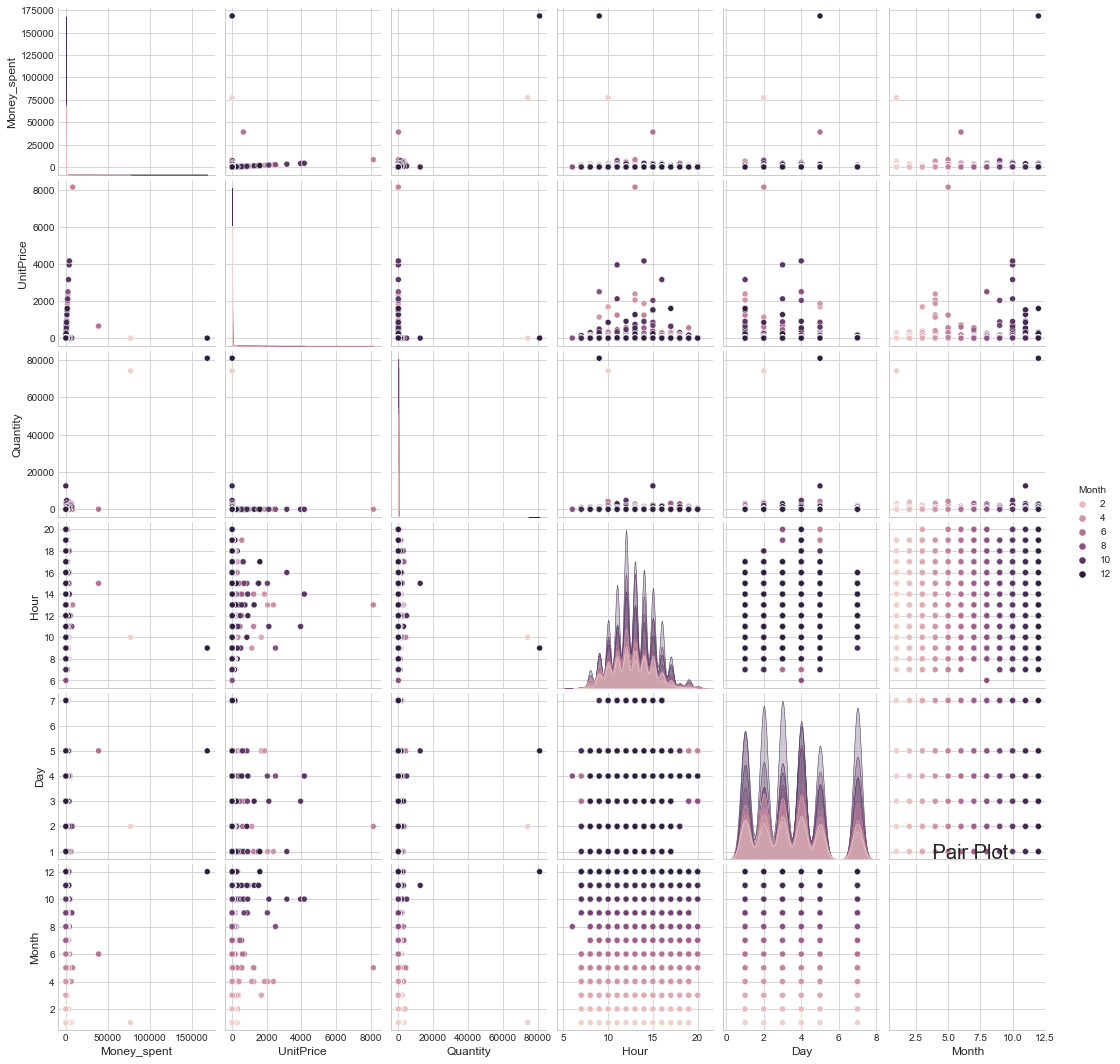

In [318]:
sns.pairplot(df,vars= [ 'Money_spent', 'UnitPrice','Quantity', 'Hour','Day' ,'Month'] ,hue ='Month')
plt.title(' Pair Plot' ,size =20)

k. Line chart to show the trend of data - All Numeric/Date Variables


Text(0, 0.5, 'Money_spent')

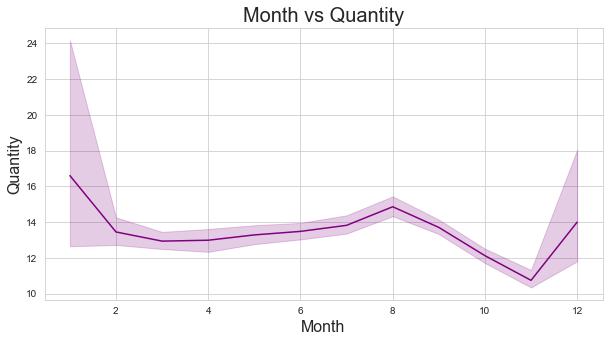

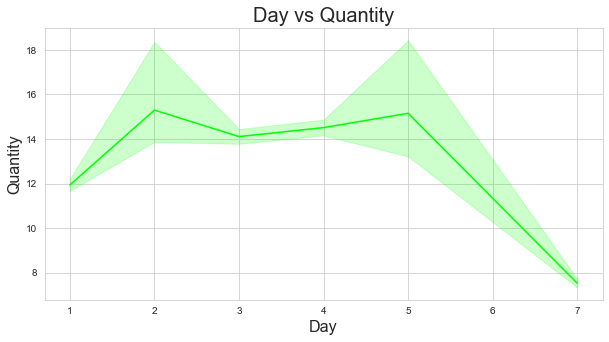

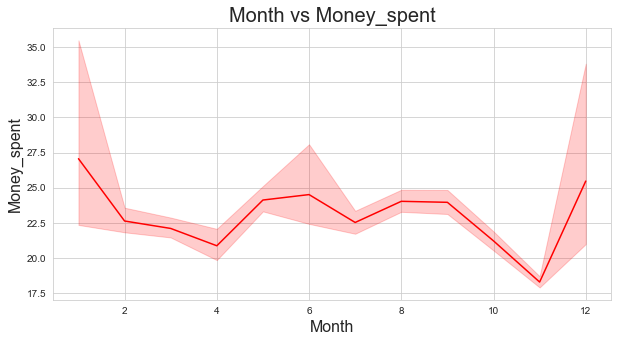

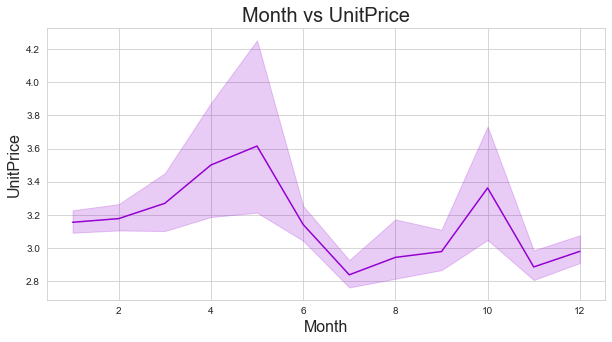

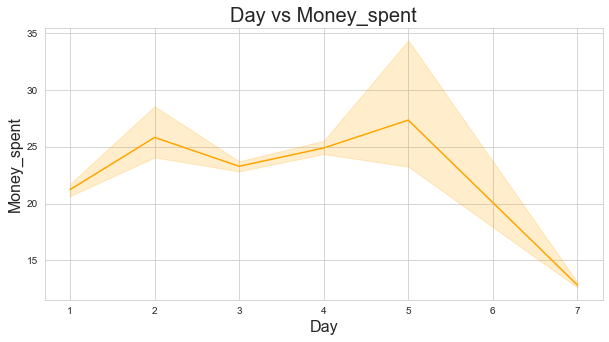

In [163]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot( x = 'Month' ,y='Quantity',data =df ,color='purple'   )
ax.set_title('Month vs Quantity',size =20 )
ax.set_xlabel('Month',size=16)
ax.set_ylabel('Quantity',size=16)

fig, ah = plt.subplots(figsize=(10,5))
ah = sns.lineplot( x = 'Day' ,y='Quantity',data =df ,color='lime'   )
ah.set_title('Day vs Quantity',size =20 )
ah.set_xlabel('Day',size=16)
ah.set_ylabel('Quantity',size=16)


fig, ay = plt.subplots(figsize=(10,5))
ay = sns.lineplot( x = 'Month' ,y='Money_spent',data =df  ,color='red' )
ay.set_title('Month vs Money_spent',size =20 )
ay.set_xlabel('Month',size=16)
ay.set_ylabel('Money_spent',size=16)

fig, az = plt.subplots(figsize=(10,5))
az = sns.lineplot( x = 'Month' ,y='UnitPrice',data =df  ,color='darkviolet' )
az.set_title('Month vs UnitPrice',size =20 )
az.set_xlabel('Month',size=16)
az.set_ylabel('UnitPrice',size=16) 


fig, an= plt.subplots(figsize=(10,5))
an = sns.lineplot( x = 'Day' ,y='Money_spent',data =df  ,color='orange' )
an.set_title('Day vs Money_spent',size =20 )
an.set_xlabel('Day',size=16)
an.set_ylabel('Money_spent',size=16)



l. Plot the skewness - All Numeric Variables 

C:\Users\ravAn\AppData\Local\Temp/ipykernel_26884/424154188.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0,skipna=True).plot()


Text(0.5, 1.0, 'Skewness ')

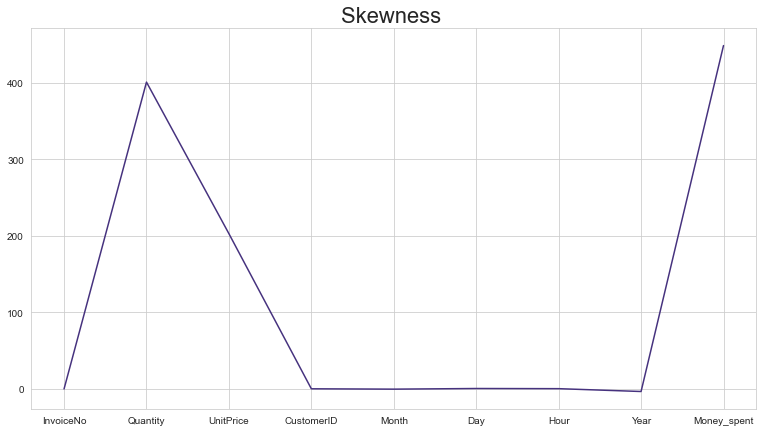

In [169]:
fig, an= plt.subplots(figsize=(13,7))        #As per Columns
df.skew(axis=0,skipna=True).plot() 
an.set_title('Skewness ',size =22)  

C:\Users\ravAn\AppData\Local\Temp/ipykernel_26884/226574710.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=1,skipna=True).plot()


Text(0.5, 1.0, 'Skewness ')

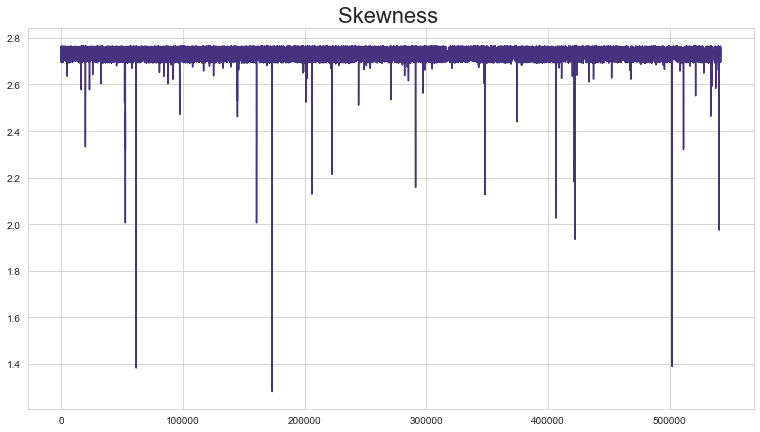

In [172]:
fig, an= plt.subplots(figsize=(13,7))         #As per Rows
df.skew(axis=1,skipna=True).plot() 
an.set_title('Skewness ',size =22)

### 6. How many orders made by the customers? 


In [99]:
df['CustomerID'].value_counts().head(5)

17841.0    7676
14911.0    5672
14096.0    5111
12748.0    4413
14606.0    2677
Name: CustomerID, dtype: int64

In [100]:
df.groupby('CustomerID')['InvoiceNo'].count().head()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

### 7. TOP 5 customers with higher number of orders 


In [109]:
df.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending =False).head(5)

CustomerID
17841.0    7676
14911.0    5672
14096.0    5111
12748.0    4413
14606.0    2677
Name: InvoiceNo, dtype: int64

In [297]:
Top_5_Cust = df.groupby('CustomerID')['InvoiceNo'].count().round(2).sort_values(ascending =False).head(5)

Text(0, 0.5, 'Orders')

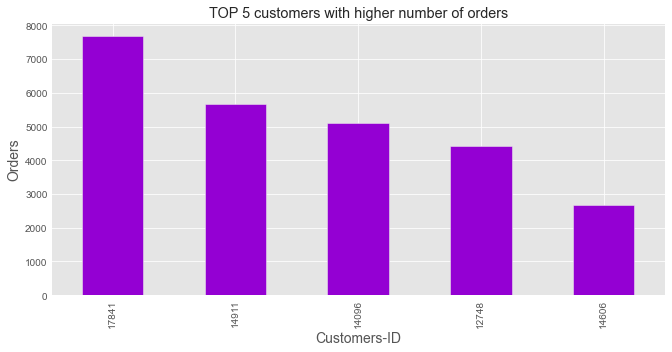

In [300]:
plt.subplots(nrows =1 ,ncols=1 ,figsize =(11,5))
plt.style.use('ggplot')
Top_5_Cust.plot.bar(color = 'darkViolet')
plt.title( 'TOP 5 customers with higher number of orders')
plt.xlabel('Customers-ID' ,size =14)
plt.ylabel('Orders' ,size =14)

### 8. How much money spent by the customers? 

In [173]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [174]:
df.groupby('CustomerID')['Money_spent'].sum()

CustomerID
12346    77183.60
12347     4310.00
12348     1797.24
12349     1757.55
12350      334.40
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2045.53
18287     1837.28
Name: Money_spent, Length: 4339, dtype: float64

In [177]:
graph = df.groupby('CustomerID')['Money_spent'].sum()

Text(0, 0.5, 'Money_Spent')

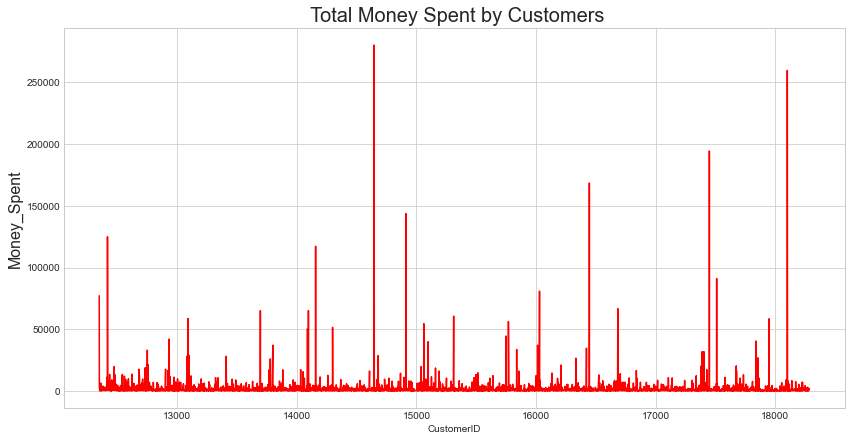

In [220]:
plt.subplots(nrows =1 ,ncols=1 ,figsize =(14,7))
plt.style.use('seaborn-whitegrid' )
graph.plot(kind ='line' , color = 'red')
plt.title( ' Total Money Spent by Customers',size =20)
plt.ylabel('Customers',size =16)
plt.ylabel('Money_Spent' ,size =16)

### 9. TOP 5 customers with highest money spent 

In [216]:
TOP_5_customers = df.groupby(by=['CustomerID'], as_index=False)['Money_spent'].sum()

In [217]:
TOP_5_customers.sort_values(by='Money_spent', ascending=False).head()

,CustomerID,Money_spent
1690,14646,280206.02
4202,18102,259657.30
3729,17450,194390.79
3009,16446,168472.50
1880,14911,143711.17


Text(0, 0.5, 'Money Spent')

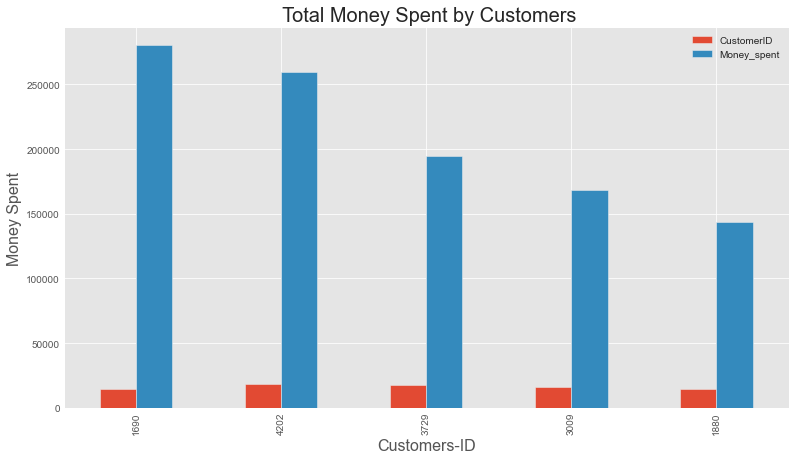

In [310]:
plt.style.use('ggplot' )
TOP_5_customers.sort_values(by='Money_spent', ascending=False).head().plot.bar(figsize=(13,7))
plt.title( ' Total Money Spent by Customers',size =20)
plt.xlabel('Customers-ID',size =16)
plt.ylabel('Money Spent' ,size =16)

### 10. How many orders per month? 


In [231]:
df['InvoiceNo'] = df['InvoiceNo'].astype(int) 

In [232]:
df['InvoiceNo'].dtype

dtype('int32')

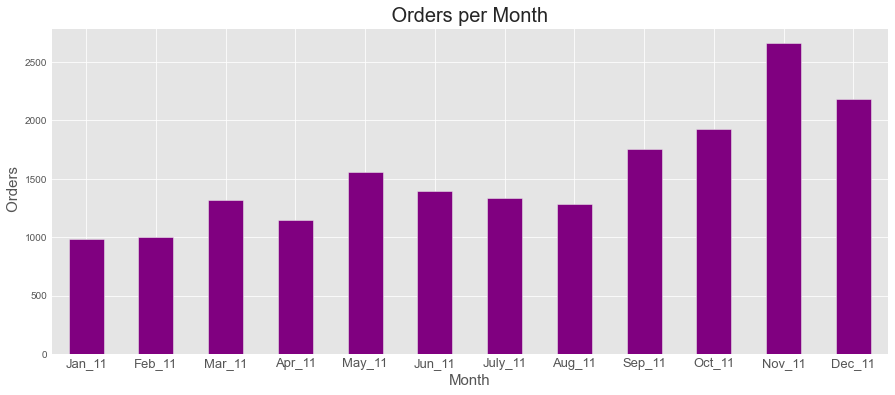

In [239]:
#opm =  ' Orders_per_month ' 
opm = df.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index().plot(kind='bar',color ='purple' ,figsize= (15,6)) 
opm.set_xlabel('Month',fontsize=15)
opm.set_ylabel(' Orders',fontsize=15)
opm.set_xticklabels(('Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'),rotation='horizontal',fontsize=13)
plt.title( ' Orders per Month ' , size =20)
plt.show()

###  another way is to map the data and plot
monthmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
            7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
            
   df['Month'] = df[Month'].map(monthmap)        

### 11. How many orders per day? 

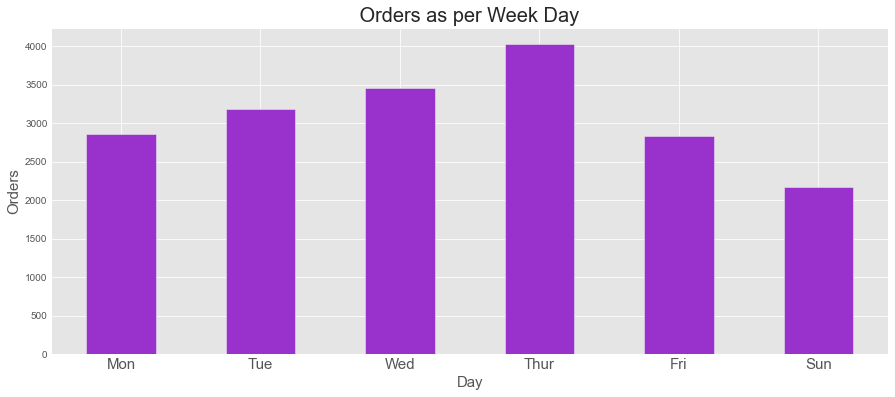

In [243]:
od = df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color='darkorchid',figsize=(15,6))
od.set_title( ' Orders as per Week Day ' , size =20)
od.set_xlabel('Day',fontsize=15)
od.set_ylabel('Orders',fontsize=15)
od.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

### 12. How many orders per hour? 

In [254]:
df['Hour'].unique() 

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6],
      dtype=int64)

In [255]:
df.groupby('InvoiceNo')['Hour'].unique().value_counts().sort_values()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[11, 12]       1
[6]            1
[20]          18
[7]           29
[19]         144
[18]         169
[17]         544
[8]          555
[16]        1100
[9]         1394
[15]        2038
[10]        2226
[14]        2275
[11]        2276
[13]        2637
[12]        3129
Name: Hour, dtype: int64

In [256]:
b =df.groupby('InvoiceNo')['Hour'].unique().value_counts().sort_values()


Text(0.5, 1.0, 'Orders per Hour')

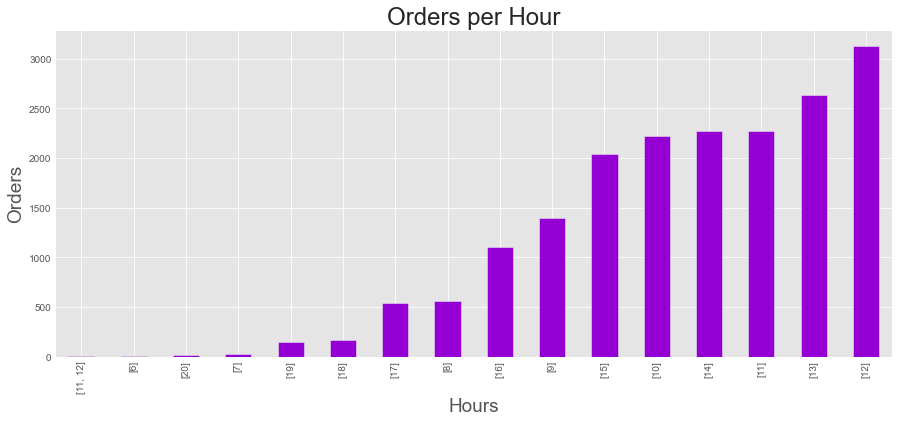

In [257]:
plt.style.use('ggplot' )
hour=df.groupby('InvoiceNo')['Hour'].unique().value_counts().sort_values().plot(kind='bar',color ='darkViolet',figsize=(15,6))
hour.set_xlabel('Hours',size =19)
hour.set_ylabel('Orders',size =19) 
plt.title('Orders per Hour' , size = 24)

### 13. How many orders for each country?

In [258]:
df.groupby('InvoiceNo')['Country'].unique().value_counts().sort_values()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[RSA]                         1
[Brazil]                      1
[Lebanon]                     1
[Saudi Arabia]                1
[Czech Republic]              2
[Bahrain]                     2
[United Arab Emirates]        3
[European Community]          4
[Lithuania]                   4
[Malta]                       5
[Greece]                      5
[USA]                         5
[Israel]                      5
[Canada]                      6
[Singapore]                   7
[Iceland]                     7
[Unspecified]                 8
[Cyprus]                     16
[Austria]                    17
[Denmark]                    18
[Poland]                     19
[Japan]                      19
[Channel Islands]            26
[Sweden]                     36
[Norway]                     36
[Italy]                      38
[Finland]                    41
[Switzerland]                51
[Portugal]                   57
[Australia]                  57
[Spain]                      90
[Netherl

In [259]:
country = df.groupby('InvoiceNo')['Country'].unique().value_counts().sort_values(ascending=True)

Text(0.5, 1.0, ' Orders for each Countries')

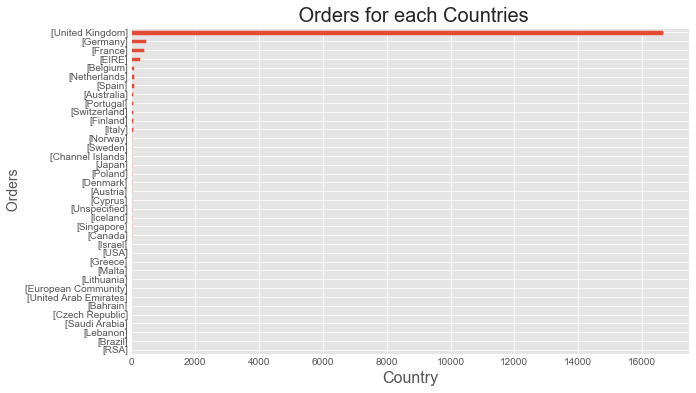

In [260]:

country.plot.barh(figsize=(10,6))
plt.ylabel(' Orders', fontsize=14)
plt.xlabel('Country', fontsize=16)
plt.title(' Orders for each Countries', fontsize=20)


In [63]:
country = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending =True)
del country['United Kingdom']

Text(0.5, 1.0, ' Orders for each Countries')

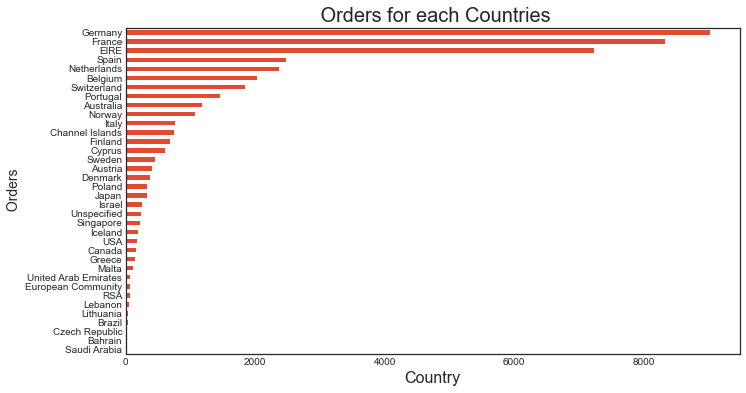

In [64]:
plt.style.use('seaborn-white' )
country.plot.barh(figsize=(11,6))
plt.ylabel(' Orders', fontsize=14)
plt.xlabel('Country', fontsize=16)
plt.title(' Orders for each Countries', fontsize=20)


### 14. Orders trend across months 


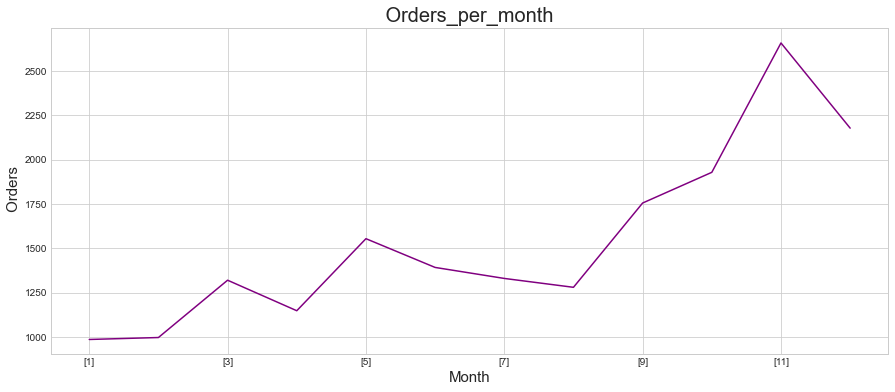

In [302]:
#opm =  ' Orders_per_month ' 
plt.style.use('seaborn-whitegrid' )
opm = df.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index().plot(kind='line',color ='purple' ,figsize= (15,6)) 
opm.set_xlabel('Month',fontsize=15)
opm.set_ylabel(' Orders',fontsize=15)
plt.title( ' Orders_per_month ' , size =20)
plt.show()

### 15. How much money spent by each country? 

In [68]:
df.groupby('Country')['Money_spent'].sum().sort_values(ascending =False).round(2)

Country
United Kingdom          7285024.64
Netherlands              285446.34
EIRE                     265262.46
Germany                  228678.40
France                   208934.31
Australia                138453.81
Spain                     61558.56
Switzerland               56443.95
Belgium                   41196.34
Sweden                    38367.83
Japan                     37416.37
Norway                    36165.44
Portugal                  33375.84
Finland                   22546.08
Singapore                 21279.29
Channel Islands           20440.54
Denmark                   18955.34
Italy                     17483.24
Cyprus                    13502.85
Austria                   10198.68
Poland                     7334.65
Israel                     7215.84
Greece                     4760.52
Iceland                    4310.00
Canada                     3666.38
USA                        3580.39
Malta                      2725.59
Unspecified                2660.77
United Arab 

Text(0.5, 1.0, ' Money spent by Countries')

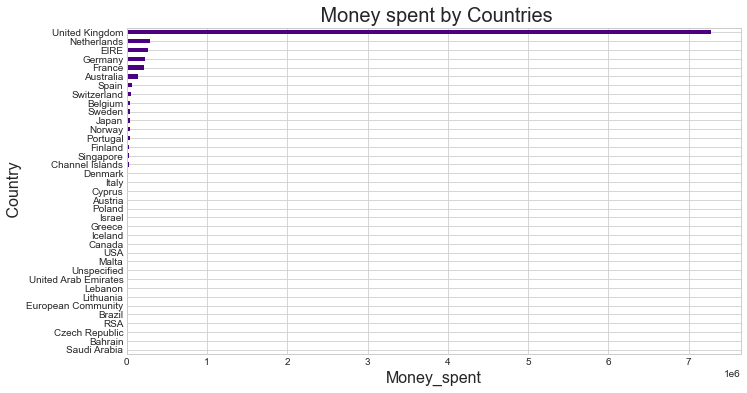

In [69]:
df.groupby('Country')['Money_spent'].sum().sort_values(ascending =True).round(2).plot(kind = 'barh' ,color = 'indigo' ,figsize = (11,6))
group_country_amount_spent = df.groupby('Country')['Money_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']
plt.ylabel(' Country', fontsize=16)
plt.xlabel('Money_spent', fontsize=16)
plt.title(' Money spent by Countries', fontsize=20)

In [262]:
country = df.groupby('Country')['Money_spent'].sum().sort_values(ascending =True)
del country ['United Kingdom']

Text(0.5, 1.0, ' Orders for each Countries')

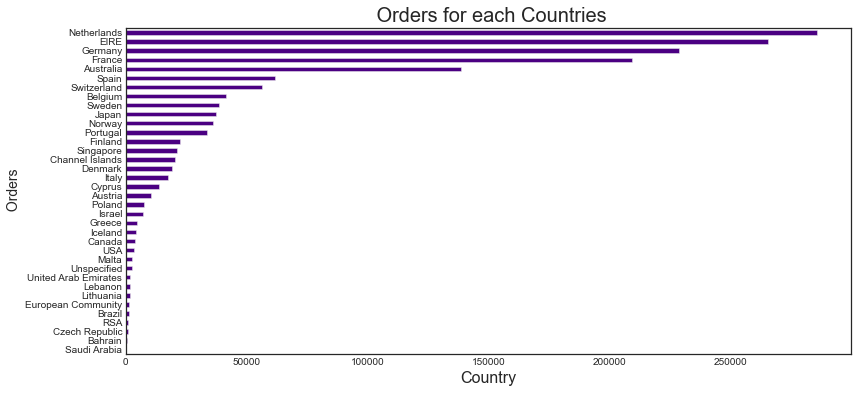

In [265]:
plt.style.use('seaborn-white' )
country.plot.barh(figsize=(13,6) ,color= 'indigo')
plt.ylabel(' Orders', fontsize=14)
plt.xlabel('Country', fontsize=16)
plt.title(' Orders for each Countries', fontsize=20)
